In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#First we generate the piano roll from y_test_pred, that has been predicted by the model
arr = np.load('/content/drive/MyDrive/Post-Processing/CQT2.npy')
print(np.shape(arr))

(5157, 100, 88)


In [ ]:
#backtracking to convert 3D array to 2D
X=[]
i=0
for i in range(5157):
  if i==0:
    X=arr[0]
  else:
    X=np.concatenate((X, arr[i]), axis=0)
print(X.shape)

(515700, 88)


In [ ]:
#converting boolean to binary matrix with entries 0 and 1
arr2 = np.empty((515700, 88), dtype = int) 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j]==False:
            arr2[i,j]=int(0)
            int(arr2[i,j])
        elif X[i,j]==True:
            arr2[i,j]=int(1)

print(arr2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
!pip install midiutil

     |████████████████████████████████| 1.0 MB 4.9 MB/s 
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54566 sha256=194a3a0604d8380bc4195434938c2d500fb58378c4ae8c90595ed45b43593709
  Stored in directory: /root/.cache/pip/wheels/e3/97/cd/a677b61a76d575f373e2e10302f1d9106507fea6dd1320df03
Successfully built midiutil


In [ ]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr2.shape[1]):
        if X[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)

In [ ]:
#generate the MIDI file for y_test_pred
with open("output_final.mid", 'wb') as outf:
    mf.writeFile(outf)

In [ ]:
!pip install pretty_midi

     |████████████████████████████████| 5.6 MB 4.1 MB/s 
     |████████████████████████████████| 51 kB 4.9 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=2104b0409979acfe5aaece9c773d05c71b29a4b8b648b30cbd5b53fd37d571a1
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi


In [ ]:
import pretty_midi
import pandas as pd
path = "output_final.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

            Start         End  Pitch  Velocity Instrument
0        0.000000    0.000521     29       100     Output
1        0.000000    0.000521     41       100     Output
2        0.000000    0.002083     81       100     Output
3        0.000521    0.001042     29       100     Output
4        0.000521    0.001042     41       100     Output
...           ...         ...    ...       ...        ...
90712  124.962500  124.967187     81       100     Output
90713  124.987500  124.992188     51       100     Output
90714  124.987500  124.992188     54       100     Output
90715  124.987500  124.992188     81       100     Output
90716  124.987500  124.992188     84       100     Output

[90717 rows x 5 columns]


From Model


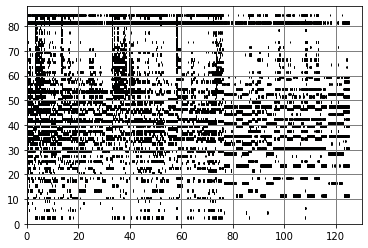

In [ ]:
fig, ax = plt.subplots()
 
i = 0
while(i<90716) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  
 
plt.xlim([0, 130])
plt.ylim([0, 88])
 
plt.grid(color='grey',linewidth=1)
 
print('From Model')
plt.show()

In [ ]:
arr3 = np.load('/content/drive/MyDrive/CQT2files/Ytestfinal.npy')
arr3=np.squeeze(arr3, axis=-2)
print(np.shape(arr3))

(5157, 100, 88)


In [ ]:
#backtracking to convert 3D array to 2D
X2=[]
i=0
for i in range(5157):
  if i==0:
    X2=arr3[0]
  else:
    X2=np.concatenate((X2, arr3[i]), axis=0)
print(X2.shape)

(515700, 88)


In [ ]:
#converting boolean to binary matrix with entries 0 and 1
arr4 = np.empty((515700, 88), dtype = int) 
for i in range(X2.shape[0]):
    for j in range(X2.shape[1]):
        if X2[i,j]==False:
            arr4[i,j]=int(0)
            int(arr4[i,j])
        elif X2[i,j]==True:
            arr4[i,j]=int(1)

         
print(arr4)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr4.shape[1]):
        if X2[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)

In [ ]:
#generate the MIDI file for y_test_pred
with open("output_final_actual.mid", 'wb') as outf:
    mf.writeFile(outf)

In [ ]:
import pretty_midi
import pandas as pd
path = "output_final_actual.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

            Start         End  Pitch  Velocity Instrument
0        0.000000    0.000521     41       100     Output
1        0.000521    0.001042     41       100     Output
2        0.001042    0.001563     41       100     Output
3        0.001563    0.002083     41       100     Output
4        0.002083    0.002604     41       100     Output
...           ...         ...    ...       ...        ...
53348  124.987500  124.992188     47       100     Output
53349  124.987500  124.992188     51       100     Output
53350  124.987500  124.992188     54       100     Output
53351  124.987500  124.992188     59       100     Output
53352  124.987500  124.992188     61       100     Output

[53353 rows x 5 columns]


Actual


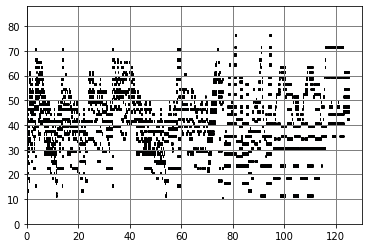

In [ ]:
fig, ax = plt.subplots()

i = 0
while(i<53353) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('Actual')
plt.show()